<a href="https://colab.research.google.com/github/sruthiskumar/flink-benchmark/blob/master/FlinkNDB_Benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preprocess the CSV file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def read_file(url):  
  df = pd.read_csv(url)
  df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S:%f')
  return df

In [ ]:
def processing(experiment):
  df_ndb_read = read_file('/content/'+ experiment + '/ndb-read.csv')
  df_ndb_write = read_file('/content/'+ experiment + '/ndb-write.csv')
  df_rock_read = read_file('/content/' + experiment + '/rocksdb-read.csv')
  df_rock_write = read_file('/content/' + experiment + '/rocksdb-write.csv')

  df_rock_read = df_rock_read[:len(df_ndb_read)]
  df_rock_write = df_rock_write[:len(df_ndb_write)] 
  sma_window=100
  # massage and get the sample for the graph
  df_ndb_read['SMA_400'] = df_ndb_read.iloc[:,1].rolling(window=sma_window).mean()
  df_ndb_write['SMA_400'] = df_ndb_write.iloc[:,1].rolling(window=sma_window).mean()
  df_rock_read['SMA_400'] = df_rock_read.iloc[:,1].rolling(window=sma_window).mean()
  df_rock_write['SMA_400'] = df_rock_write.iloc[:,1].rolling(window=sma_window).mean()

  nth_sample=50
  df_ndb_read_sampled = df_ndb_read.iloc[::nth_sample, :] # taking 100th sample
  df_rock_read_sampled = df_rock_read.iloc[::nth_sample, :] # taking 100th sample


  f = plt.figure(figsize=(20, 4))
  axes = f.gca()
  axes.plot(df_ndb_read_sampled['Time'],df_rock_read_sampled['SMA_400'], label='rocks-read SMA', color='#1f77b4')
  axes.plot(df_ndb_read_sampled['Time'],df_ndb_read_sampled['SMA_400'],label='ndb-read SMA', color='#ff7f0e')
  axes.legend()
  axes.set_ylim([0,50])
  f.suptitle('Read Rolling Average',fontsize=28)
  #axes.title='Read Rolling Average'


  df_ndb_write_sampled = df_ndb_write.iloc[::nth_sample, :] 
  df_rock_write_sampled = df_rock_write.iloc[::nth_sample, :]
  f = plt.figure(figsize=(20, 4))
  f.suptitle('Write Rolling Average', fontsize=28)
  axes = f.gca()
  axes.plot(df_ndb_write_sampled['Time'],df_rock_write_sampled['SMA_400'],label='rocks-write SMA', color='#1f77b4')
  axes.plot(df_ndb_write_sampled['Time'],df_ndb_write_sampled['SMA_400'],label='ndb-write SMA', color='#ff7f0e')
  axes.legend()
  axes.set_ylim([0,700]) 

  # f = plt.figure(figsize=(10, 4))
  # df_ndb_write_sampled[df_ndb_write_sampled['Write']<200].boxplot(column='Write', color='#ff7f0e')
  # df_rock_write_sampled[df_rock_write_sampled['Write']<200].boxplot(column='Write', color='#1f77b4')
  # f = plt.figure(figsize=(10, 4))
  # df_ndb_read_sampled[df_ndb_read_sampled['Read']<100].boxplot(column='Read', color='#ff7f0e')
  # df_rock_read_sampled[df_rock_read_sampled['Read']<100].boxplot(column='Read', color='#1f77b4')

  f = plt.figure(figsize=(10, 4))

  data_read = [df_ndb_read_sampled["Read"], df_rock_read_sampled["Read"]]
  headers_read = ['NDB Read', 'RocksDB Read']
  df_read = pd.concat(data_read, axis=1, keys=headers_read)
  df_read.boxplot(showfliers=False)
  f = plt.figure(figsize=(10, 4))
  data_write = [df_ndb_write_sampled["Write"], df_rock_write_sampled["Write"]]
  headers = ['NDB Write', 'RocksDB Write']
  df_write = pd.concat(data_write, axis=1, keys=headers)
  df_write.boxplot(showfliers=False)

In [ ]:
def processing_recovery(experiment):
  df_ndb_read_recovery = read_file('/content/' + experiment + '/ndb-recovery-read.csv')
  df_ndb_write_recovery = read_file('/content/' + experiment + '/ndb-recovery-write.csv')
  df_rock_read_recovery = read_file('/content/' + experiment + '/rocksdb-recovery-read.csv')
  df_rock_write_recovery = read_file('/content/' + experiment + '/rocksdb-recovery-write.csv')

  if(df_rock_read_recovery.size > df_ndb_read_recovery.size):
    df_rock_read_recovery = df_rock_read_recovery[:len(df_ndb_read_recovery)]
    df_rock_write_recovery = df_rock_write_recovery[:len(df_ndb_write_recovery)]
  elif(df_rock_read_recovery.size < df_ndb_read_recovery.size):
    df_ndb_read_recovery = df_ndb_read_recovery[:len(df_rock_read_recovery)]
    df_ndb_write_recovery = df_ndb_write_recovery[:len(df_rock_write_recovery)]

  sma_window=100
  # massage and get the sample for the graph
  df_ndb_read_recovery['SMA_400'] = df_ndb_read_recovery.iloc[:,1].rolling(window=sma_window).mean()
  df_ndb_write_recovery['SMA_400'] = df_ndb_write_recovery.iloc[:,1].rolling(window=sma_window).mean()
  df_rock_read_recovery['SMA_400'] = df_rock_read_recovery.iloc[:,1].rolling(window=sma_window).mean()
  df_rock_write_recovery['SMA_400'] = df_rock_write_recovery.iloc[:,1].rolling(window=sma_window).mean()
  # df_ndb_read_recovery.dropna(subset = ["SMA_400"], inplace=True)
  # df_ndb_write_recovery.dropna(subset = ["SMA_400"], inplace=True)

  df_ndb_read_recovery_sampled = df_ndb_read_recovery.iloc[::50, :] # taking 100th sample
  df_rock_read_recovery_sampled = df_rock_read_recovery.iloc[::50, :] # taking 100th sample

  f = plt.figure(figsize=(20, 4))
  axes = f.gca()
  axes.plot(df_ndb_read_recovery_sampled['Time'],df_rock_read_recovery_sampled['Read'], label='rocks-read SMA', color='#1f77b4')
  axes.plot(df_ndb_read_recovery_sampled['Time'],df_ndb_read_recovery_sampled['Read'],label='ndb-read SMA', color='#ff7f0e')
  axes.legend()
  axes.set_ylim([0,50])
  f.suptitle('Read Rolling Average Recovery',fontsize=28)
  #axes.title='Read Rolling Average'

  df_ndb_write_recovery_sampled = df_ndb_write_recovery.iloc[::50, :] 
  df_rock_write_recovery_sampled = df_rock_write_recovery.iloc[::50, :]

  f = plt.figure(figsize=(20, 4))
  f.suptitle('Write Rolling Average Recovery', fontsize=28)
  axes = f.gca()
  axes.plot(df_ndb_write_recovery_sampled['Time'],df_rock_write_recovery_sampled['SMA_400'],label='rocks-write SMA', color='#1f77b4')
  axes.plot(df_ndb_write_recovery_sampled['Time'],df_ndb_write_recovery_sampled['SMA_400'],label='ndb-write SMA', color='#ff7f0e')
  axes.legend()
  axes.set_ylim([0,500]) 

  # f = plt.figure(figsize=(10, 4))
  # df_ndb_write_sampled[df_ndb_write_sampled['Write']<200].boxplot(column='Write', color='#ff7f0e')
  # df_rock_write_sampled[df_rock_write_sampled['Write']<200].boxplot(column='Write', color='#1f77b4')
  # f = plt.figure(figsize=(10, 4))
  # df_ndb_read_sampled[df_ndb_read_sampled['Read']<100].boxplot(column='Read', color='#ff7f0e')
  # df_rock_read_sampled[df_rock_read_sampled['Read']<100].boxplot(column='Read', color='#1f77b4')

  f = plt.figure(figsize=(10, 4))

  data_read = [df_ndb_read_recovery_sampled["Read"], df_rock_read_recovery_sampled["Read"]]
  headers_read = ['NDB Read', 'RocksDB Read']
  df_read = pd.concat(data_read, axis=1, keys=headers_read)
  df_read.boxplot(showfliers=False)
  f = plt.figure(figsize=(10, 4))
  data_write = [df_ndb_write_recovery_sampled["Write"], df_rock_write_recovery_sampled["Write"]]
  headers = ['NDB Write', 'RocksDB Write']
  df_write = pd.concat(data_write, axis=1, keys=headers)
  df_write.boxplot(showfliers=False)


# Experiment 2 - State read & write time
We have keyed both flow both and speed stream

```
Total Keys - 110
Cache Hit - 502292
Cache Miss - 110
```



In [ ]:
 !gsutil cp -r gs://flinkndb-benchmark/kafka/experiment8 .
processing('experiment2')

Copying gs://flinkndb-benchmark/kafka/experiment8/ndb-read.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/ndb-recovery-read.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/ndb-recovery-write.csv...
/ [3 files][ 35.0 MiB/ 35.0 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://flinkndb-benchmark/kafka/experiment8/ndb-write.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/rocksdb-read.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/rocksdb-recovery-read.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/rocksdb-recovery-write.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/rocksdb-write.csv...
- [8 files][103.4 MiB/103.4 MiB]    3.8 MiB/s                                   
Op

NameError: ignored

# Experiment 2 - State read & write time with recovery
We have keyed both flow both and speed stream

```
Total Keys - 110
Cache Hit - 613979
Cache Miss - 293

Note :  Snapshot for rocksdb is saved locally
```

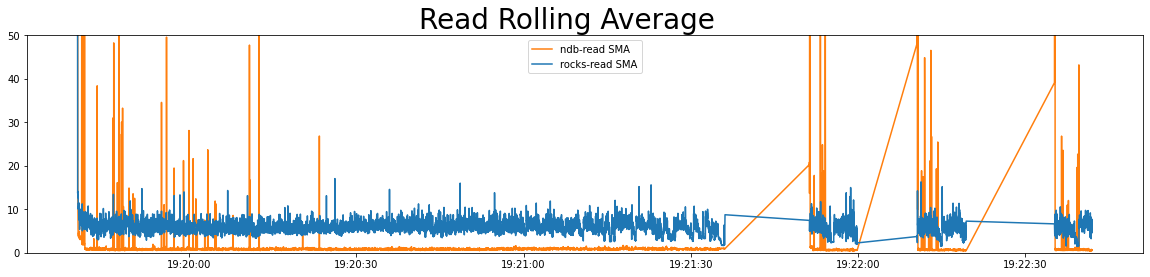

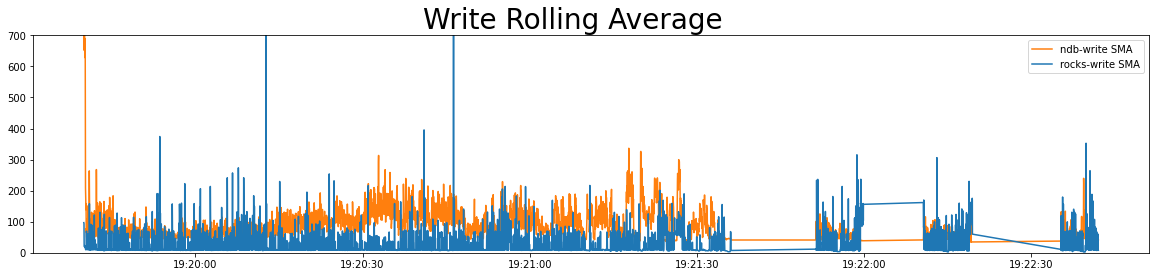

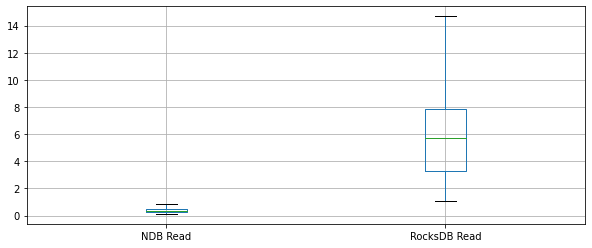

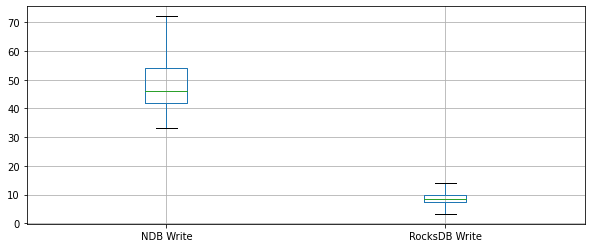

In [ ]:
#!gsutil cp -r gs://flinkndb-benchmark/kafka/experiment2-recovery .
processing('experiment2-recovery')

# Experiment 3

RocksDB Snapshot is stored in *S3*

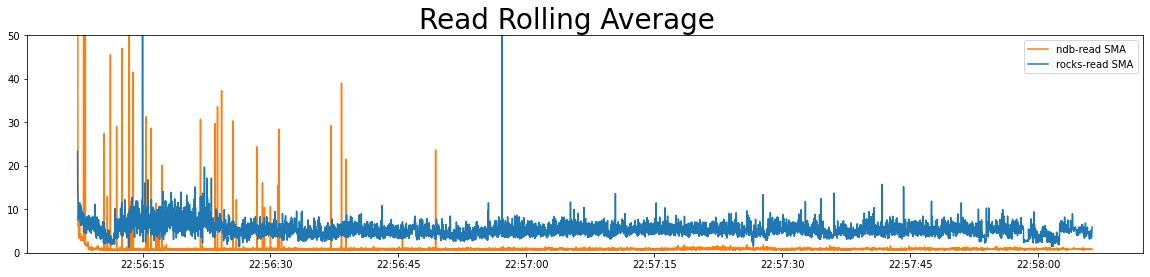

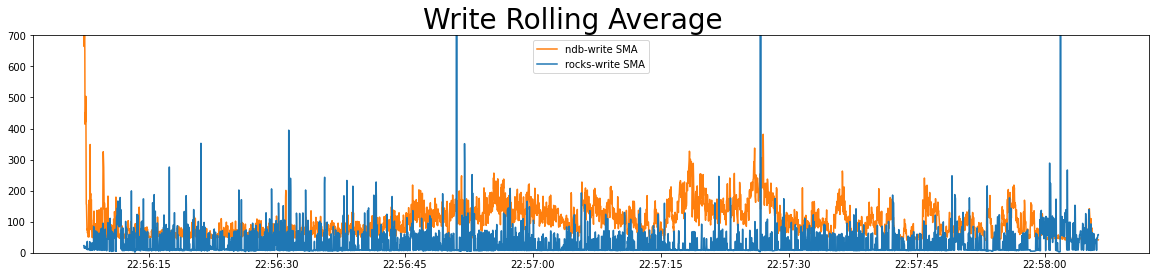

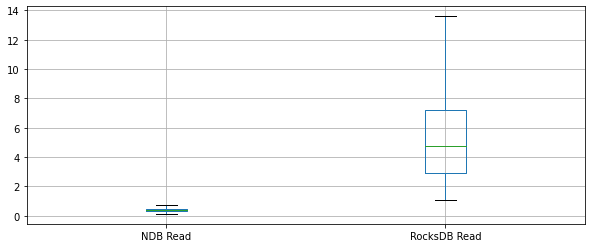

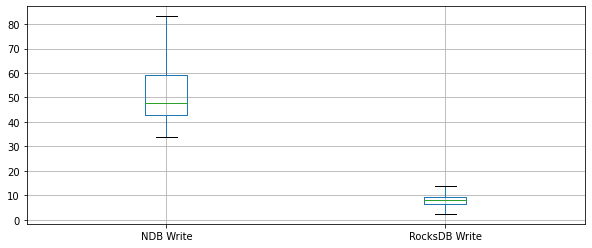

In [ ]:
#!gsutil cp -r gs://flinkndb-benchmark/kafka/experiment3 .
processing('experiment3')

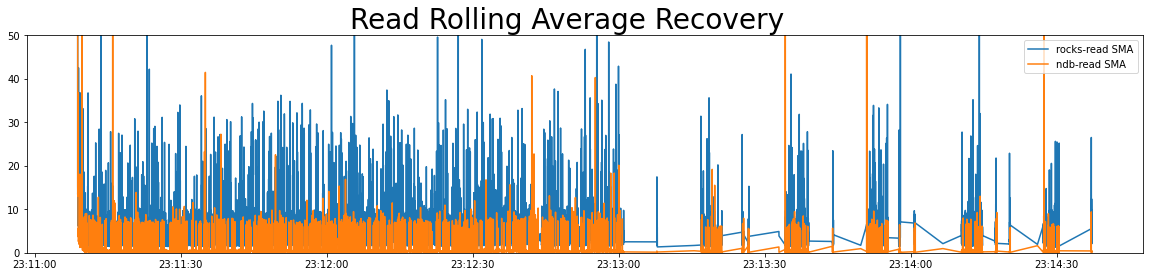

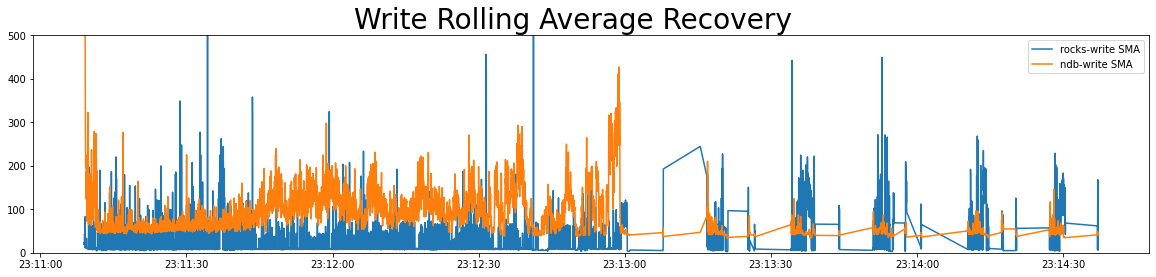

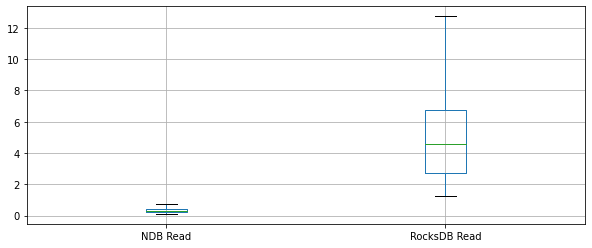

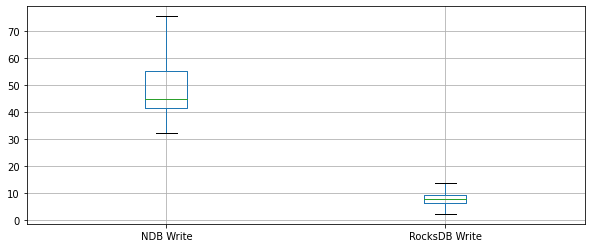

In [ ]:
processing_recovery('experiment3')

# Yet Another Run





```
Total Keys %s 345
Cache Hit %s 758868
Cache Miss %s *345*


Rocks DB Snapshot is stored in S3
State size is bigger than experiment 2
```




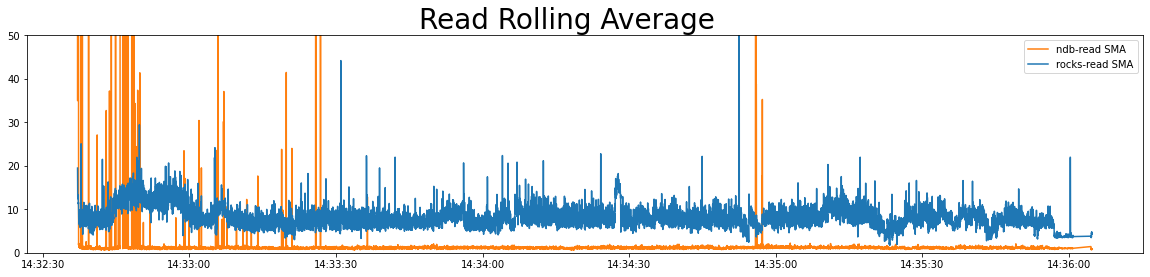

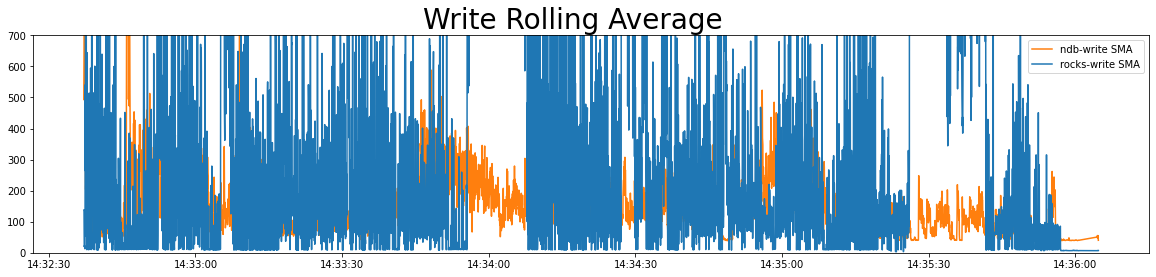

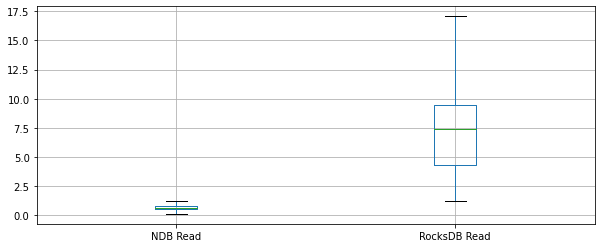

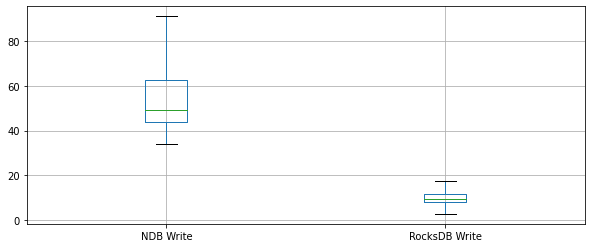

In [ ]:
#!gsutil cp -r gs://flinkndb-benchmark/kafka/experiment4 .
processing('experiment4')

# Experiment 3

**205200** Events in kafka

```
Normal Run:
Total Keys: 110
Cache Hit: 820580
Cache Miss: 110
Total Read: 820690
Total Write: 410400
Recovery:
Cache Miss: 128
```

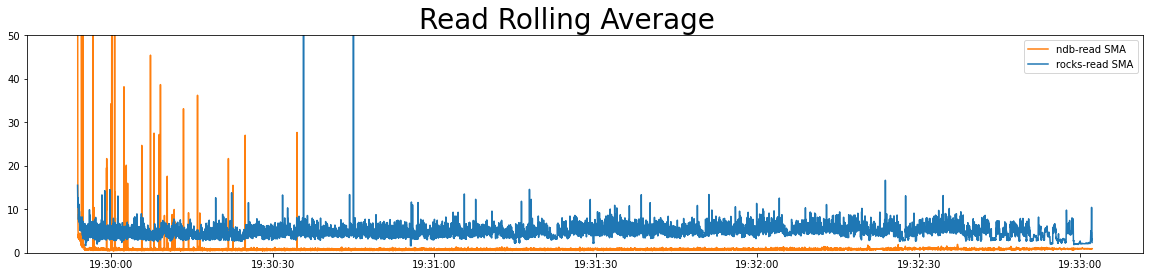

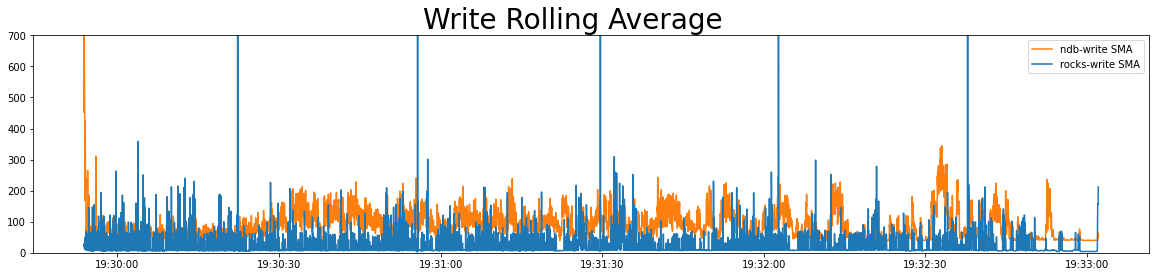

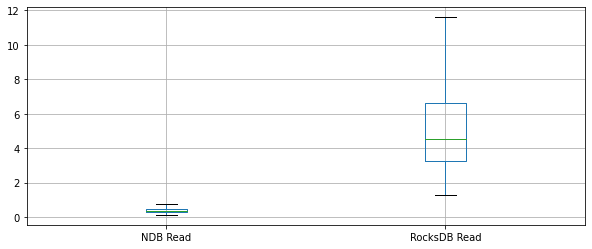

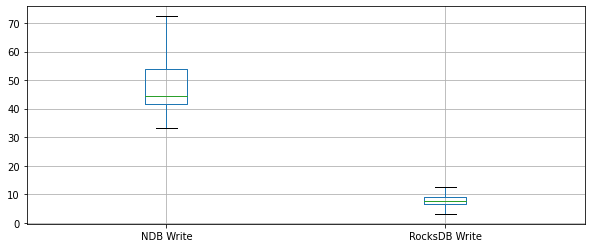

In [ ]:
#!gsutil cp -r gs://flinkndb-benchmark/kafka/experiment5 .
processing('experiment5')

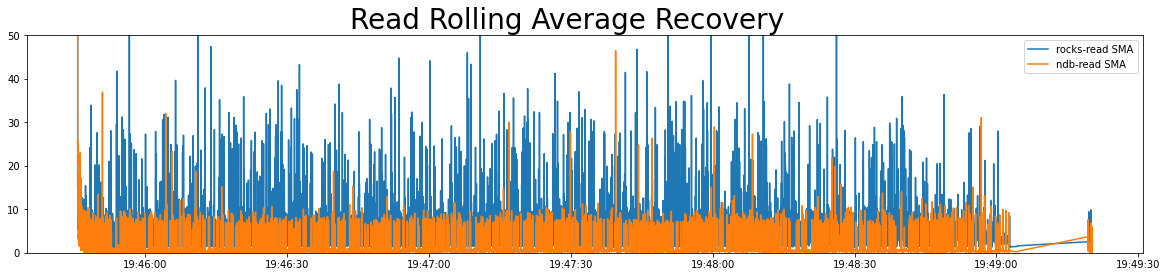

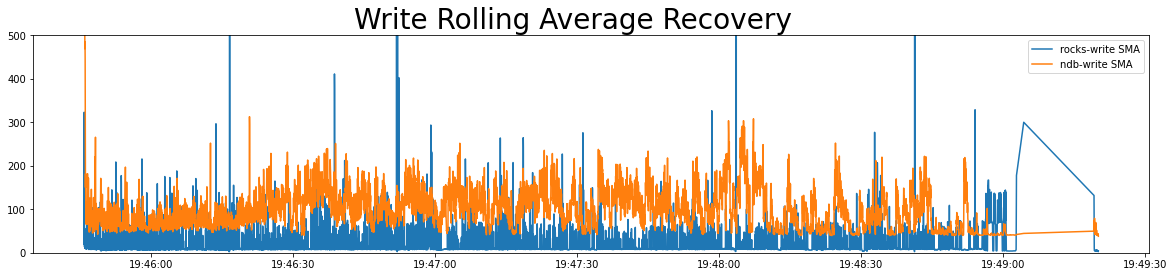

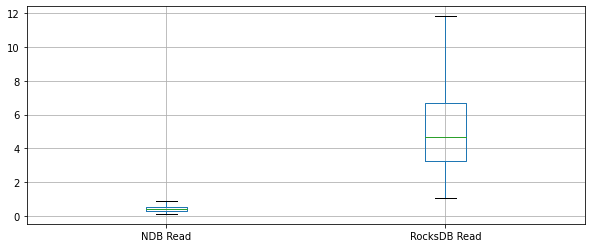

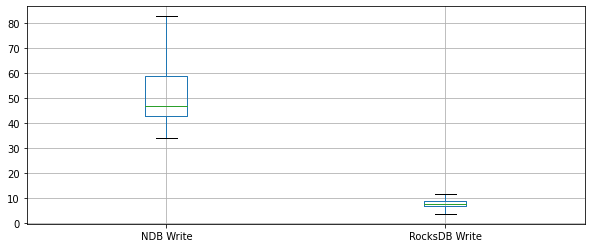

In [ ]:
processing_recovery('experiment5')

#Experiment 4

44 kb value per key
110 key
**205200** Events in kafka

flinkndb-benchmark/kafka/experiment6

Total Keys %s 110
# Cache Hit %s 820580
Cache Miss %s 110


#Experiment 5

flinkndb-benchmark/kafka/experiment7
```
Total Keys %s 685
Cache Hit %s 819423
Cache Miss %s 691
```



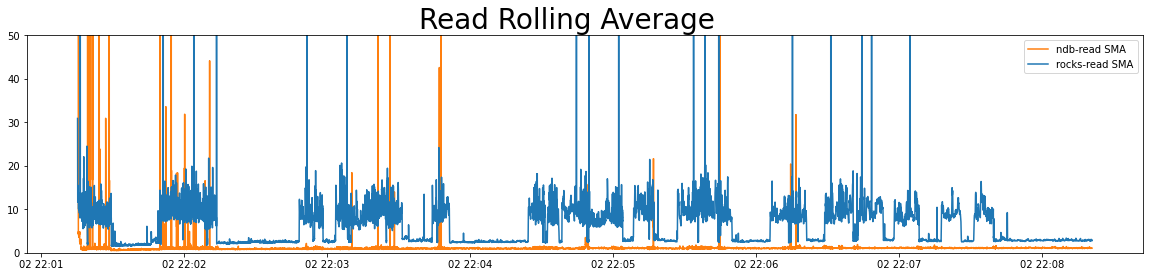

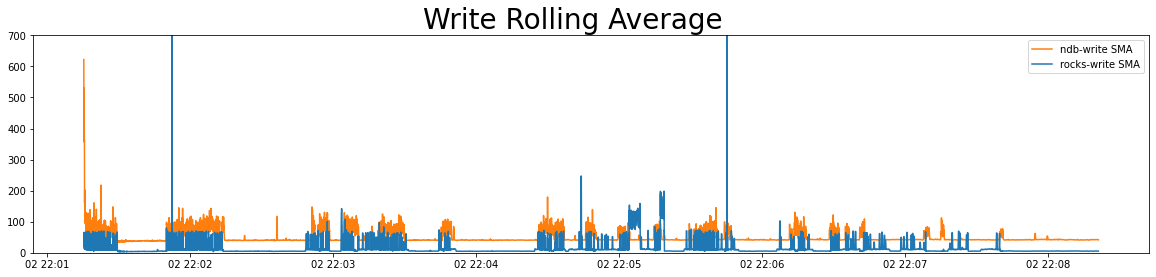

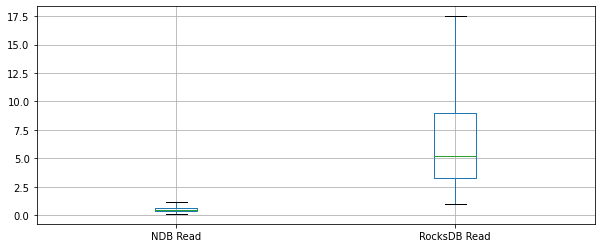

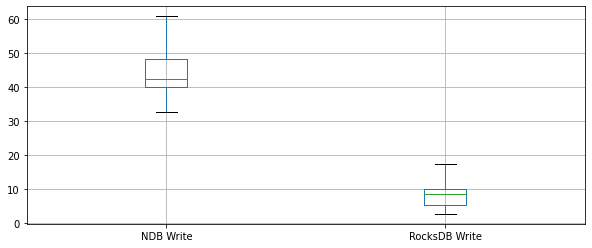

In [ ]:
#!gsutil cp -r gs://flinkndb-benchmark/kafka/experiment7 .
processing('experiment7')

##Recovery
```
Total Keys %s 685
Cache Hit %s 834660
Cache Miss %s 936
```

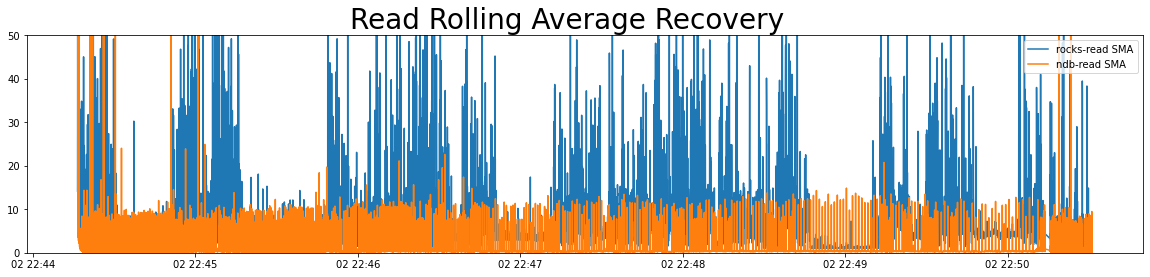

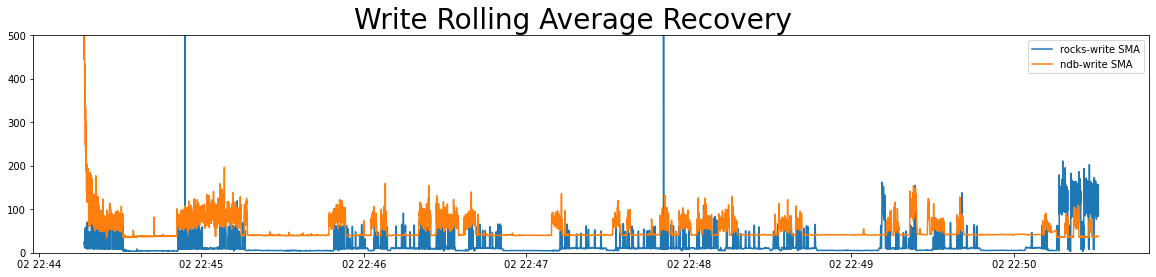

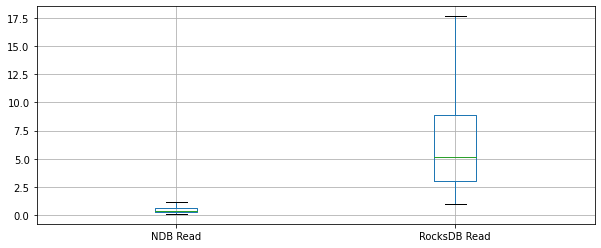

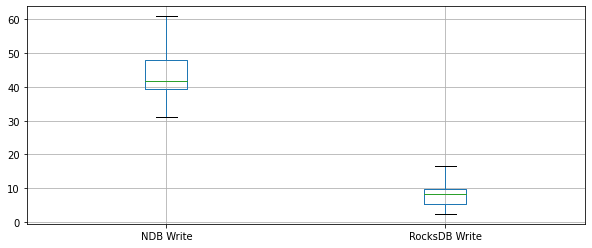

In [ ]:
#!gsutil cp -r gs://flinkndb-benchmark/kafka/experiment7 .
processing_recovery('experiment7')

# Experiment with large key set

```
Total Keys:  12832
Cache Hit:  795132
Cache Miss: 12836
```

flinkndb-benchmark/kafka/experiment8

Copying gs://flinkndb-benchmark/kafka/experiment8/ndb-read.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/ndb-recovery-read.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/ndb-recovery-write.csv...
/ [3 files][ 35.0 MiB/ 35.0 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://flinkndb-benchmark/kafka/experiment8/ndb-write.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/rocksdb-read.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/rocksdb-recovery-read.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/rocksdb-recovery-write.csv...
Copying gs://flinkndb-benchmark/kafka/experiment8/rocksdb-write.csv...
- [8 files][103.4 MiB/103.4 MiB]    4.5 MiB/s                                   
Op

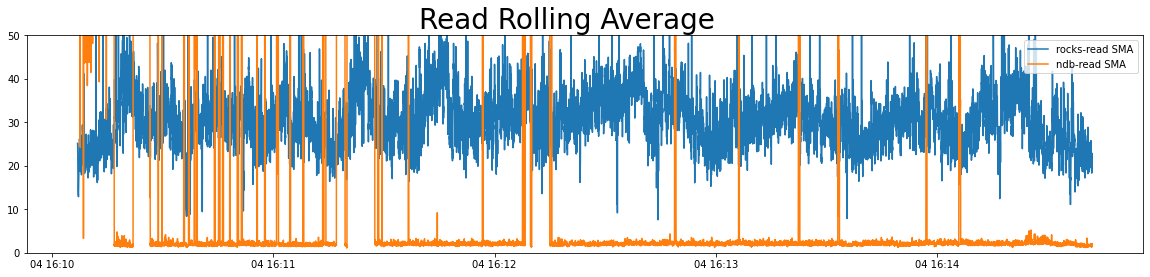

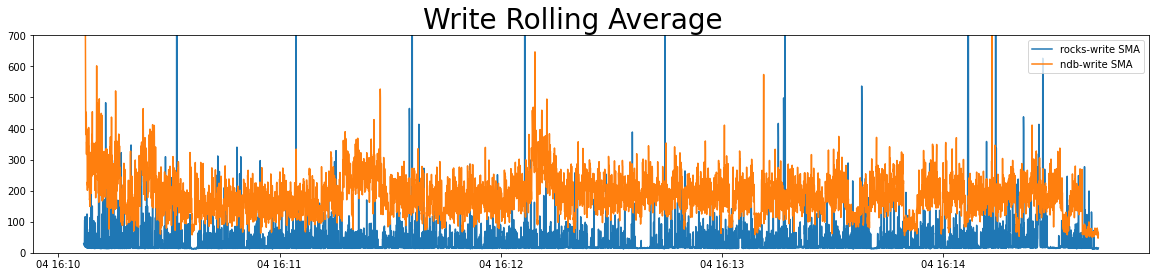

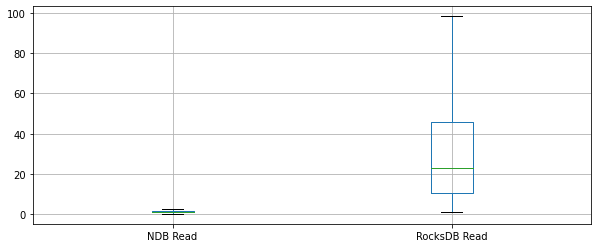

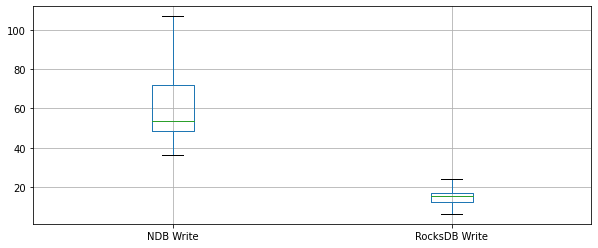

In [ ]:
!gsutil cp -r gs://flinkndb-benchmark/kafka/experiment8 .
processing('experiment8')

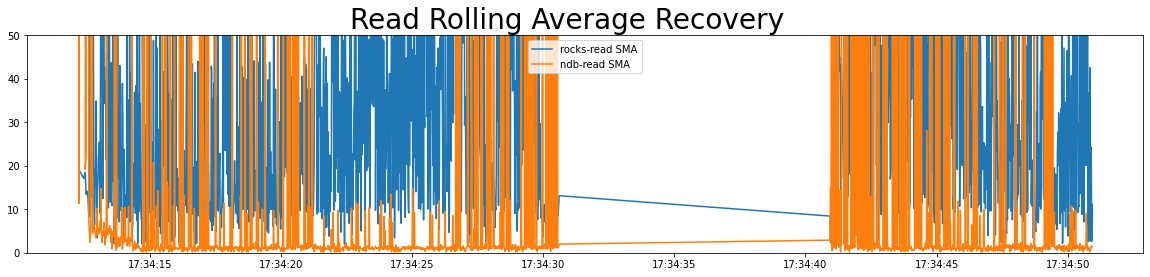

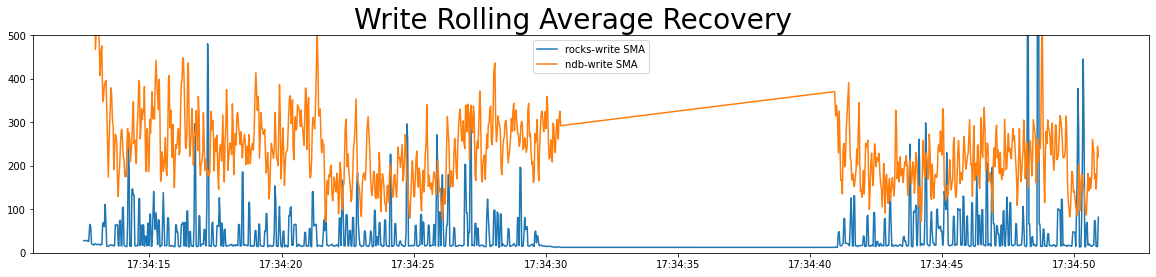

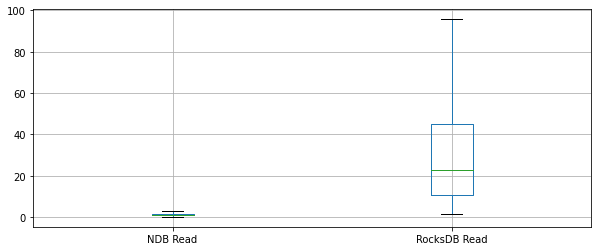

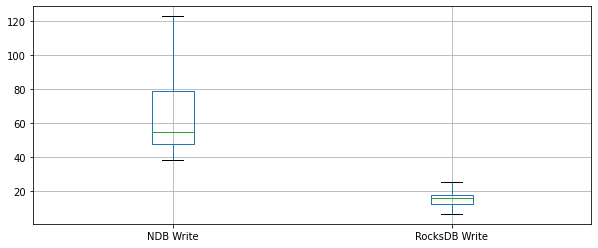

In [ ]:
processing_recovery('experiment8')

In [ ]:
#!gsutil cp -r gs://flinkndb-benchmark/kafka/experiment8 .
experiment='experiment8'
df_ndb_read_recovery = read_file('/content/' + experiment + '/ndb-recovery-read.csv')
df_ndb_write_recovery = read_file('/content/' + experiment + '/ndb-recovery-write.csv')
df_rock_read_recovery = read_file('/content/' + experiment + '/rocksdb-recovery-read.csv')
df_rock_write_recovery = read_file('/content/' + experiment + '/rocksdb-recovery-write.csv')


print(len(df_rock_read_recovery),len(df_ndb_read_recovery), len(df_rock_write_recovery),len(df_ndb_write_recovery))

# # match the number of observations in both of the datasets
# if(df_rock_read_recovery.size > df_ndb_read_recovery.size):
#   df_rock_read_recovery = df_rock_read_recovery[:len(df_ndb_read_recovery)]
#   df_rock_write_recovery = df_rock_write_recovery[:len(df_ndb_write_recovery)]
# elif(df_rock_read_recovery.size < df_ndb_read_recovery.size):
#   df_ndb_read_recovery = df_ndb_read_recovery[:len(df_rock_read_recovery)]
#   df_ndb_write_recovery = df_ndb_write_recovery[:len(df_rock_write_recovery)]

print(len(df_rock_read_recovery),len(df_ndb_read_recovery), len(df_rock_write_recovery),len(df_ndb_write_recovery))

# do the time adjustments for reads
start_ndb = df_ndb_read_recovery['Time'][0]
start_rock = df_rock_read_recovery['Time'][0]
diff = start_rock - start_ndb

120411 90796 64994 48649
120411 90796 64994 48649


In [ ]:
sma_window=100
# massage and get the sample for the graph
df_ndb_read_recovery['SMA_400'] = df_ndb_read_recovery.iloc[:,1].rolling(window=sma_window).mean()
df_ndb_write_recovery['SMA_400'] = df_ndb_write_recovery.iloc[:,1].rolling(window=sma_window).mean()
df_rock_read_recovery['SMA_400'] = df_rock_read_recovery.iloc[:,1].rolling(window=sma_window).mean()
df_rock_write_recovery['SMA_400'] = df_rock_write_recovery.iloc[:,1].rolling(window=sma_window).mean()


df_rock_read_recovery['Time'] = df_rock_read_recovery['Time'] - diff
df_rock_write_recovery['Time'] = df_rock_write_recovery['Time'] - diff
#data sampling
sampleNo = 50
df_ndb_read_recovery_sampled = df_ndb_read_recovery.iloc[::sampleNo, :] # taking 100th sample
df_rock_read_recovery_sampled = df_rock_read_recovery.iloc[::sampleNo, :] # taking 100th sample
df_ndb_write_recovery_sampled = df_ndb_write_recovery.iloc[::sampleNo, :] # taking 100th sample
df_rock_write_recovery_sampled = df_rock_write_recovery.iloc[::sampleNo, :] # taking 100th sample

In [ ]:
diff #df_rock_write_recovery.iloc[:1,[0]] 

Timedelta('0 days 00:03:30.674000')

(0.0, 750.0)

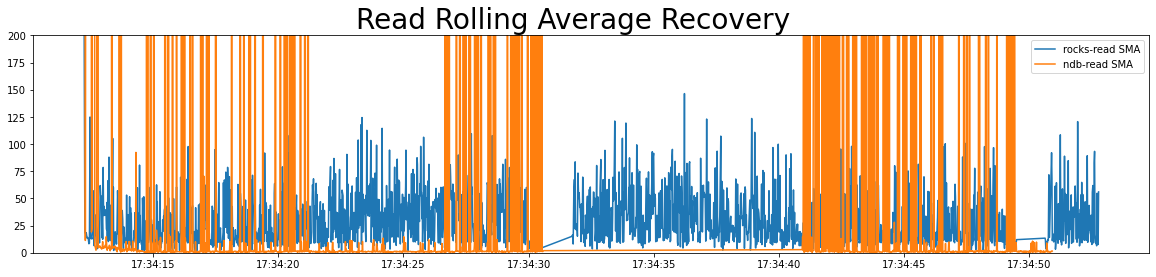

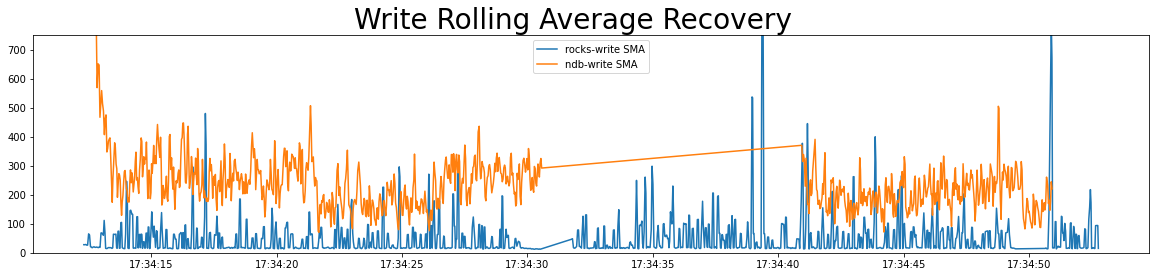

In [ ]:
# # df_ndb_read_recovery.dropna(subset = ["SMA_400"], inplace=True)
# # df_ndb_write_recovery.dropna(subset = ["SMA_400"], inplace=True)



f = plt.figure(figsize=(20, 4))
axes = f.gca()
axes.plot(df_rock_read_recovery_sampled['Time'],df_rock_read_recovery_sampled['Read'], label='rocks-read SMA', color='#1f77b4')
axes.plot(df_ndb_read_recovery_sampled['Time'],df_ndb_read_recovery_sampled['Read'],label='ndb-read SMA', color='#ff7f0e')
axes.legend()
axes.set_ylim([0,200])
f.suptitle('Read Rolling Average Recovery',fontsize=28)
#axes.title='Read Rolling Average'


f = plt.figure(figsize=(20, 4))
f.suptitle('Write Rolling Average Recovery', fontsize=28)
axes = f.gca()
axes.plot(df_rock_write_recovery_sampled['Time'],df_rock_write_recovery_sampled['SMA_400'],label='rocks-write SMA', color='#1f77b4')
axes.plot(df_ndb_write_recovery_sampled['Time'],df_ndb_write_recovery_sampled['SMA_400'],label='ndb-write SMA', color='#ff7f0e')
axes.legend()
axes.set_ylim([0,750]) 

# f = plt.figure(figsize=(10, 4))
# df_ndb_write_sampled[df_ndb_write_sampled['Write']<200].boxplot(column='Write', color='#ff7f0e')
# df_rock_write_sampled[df_rock_write_sampled['Write']<200].boxplot(column='Write', color='#1f77b4')
# f = plt.figure(figsize=(10, 4))
# df_ndb_read_sampled[df_ndb_read_sampled['Read']<100].boxplot(column='Read', color='#ff7f0e')
# df_rock_read_sampled[df_rock_read_sampled['Read']<100].boxplot(column='Read', color='#1f77b4')

# f = plt.figure(figsize=(10, 4))

# data_read = [df_ndb_read_recovery_sampled["Read"], df_rock_read_recovery_sampled["Read"]]
# headers_read = ['NDB Read', 'RocksDB Read']
# df_read = pd.concat(data_read, axis=1, keys=headers_read)
# df_read.boxplot(showfliers=False)
# f = plt.figure(figsize=(10, 4))
# data_write = [df_ndb_write_recovery_sampled["Write"], df_rock_write_recovery_sampled["Write"]]
# headers = ['NDB Write', 'RocksDB Write']
# df_write = pd.concat(data_write, axis=1, keys=headers)
# df_write.boxplot(showfliers=False)

Text(0.5, 0.98, 'Read Rolling Average Recovery')

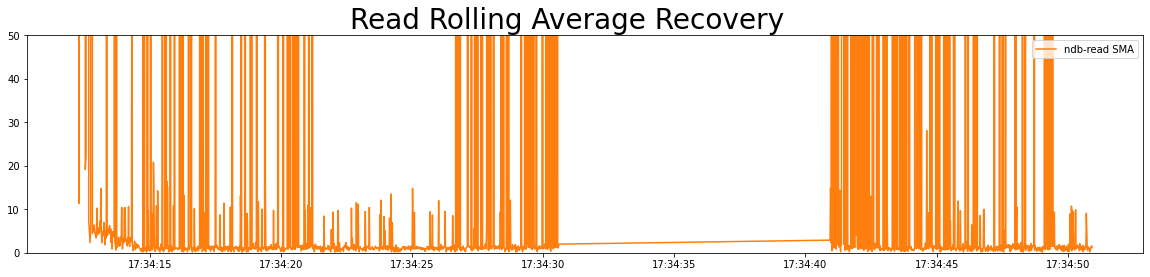

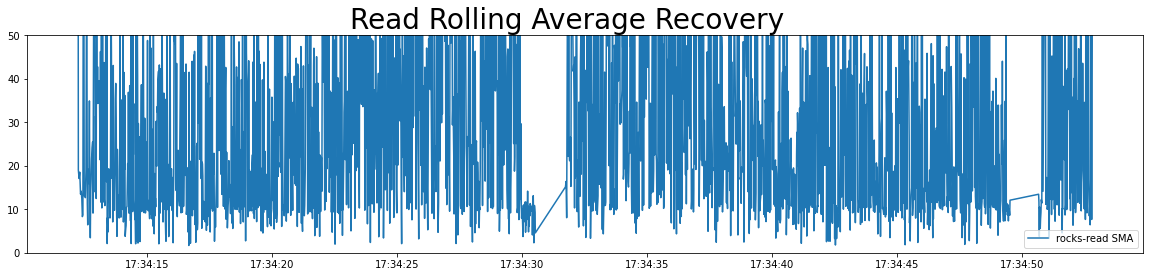

In [ ]:
f = plt.figure(figsize=(20, 4))
axes = f.gca()
axes.plot(df_ndb_read_recovery_sampled['Time'],df_ndb_read_recovery_sampled['Read'], label='ndb-read SMA', color='#ff7f0e')
#axes.plot(df_ndb_read_recovery_sampled['Time'],df_ndb_read_recovery_sampled['Read'],label='ndb-read SMA', color='#ff7f0e')
axes.legend()
axes.set_ylim([0,50])
f.suptitle('Read Rolling Average Recovery',fontsize=28)
#axes.title='Read Rolling Average'

f = plt.figure(figsize=(20, 4))
axes = f.gca()
axes.plot(df_rock_read_recovery_sampled['Time'],df_rock_read_recovery_sampled['Read'], label='rocks-read SMA',color='#1f77b4' )
#axes.plot(df_ndb_read_recovery_sampled['Time'],df_ndb_read_recovery_sampled['Read'],label='ndb-read SMA', color='#ff7f0e')
axes.legend()
axes.set_ylim([0,50])
f.suptitle('Read Rolling Average Recovery',fontsize=28)
#axes.title='Read Rolling Average'

# Experient with very large key set ans Size
```
Active Table: 66667 rows
Committed Table: 670879 rows
Snapshot Table: 18048 rows
Total Keys: 35328
Cache Hit: 3388820
Cache Miss: 118786
Total Read: 3507606
Total Write: 1787146

flinkndb-benchmark/kafka/experiment9
```

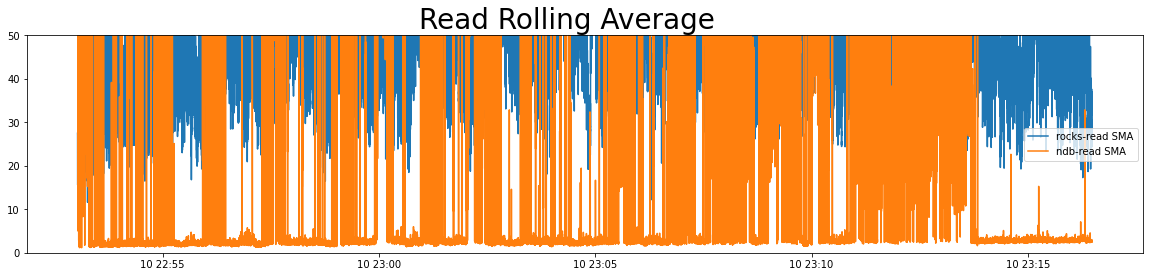

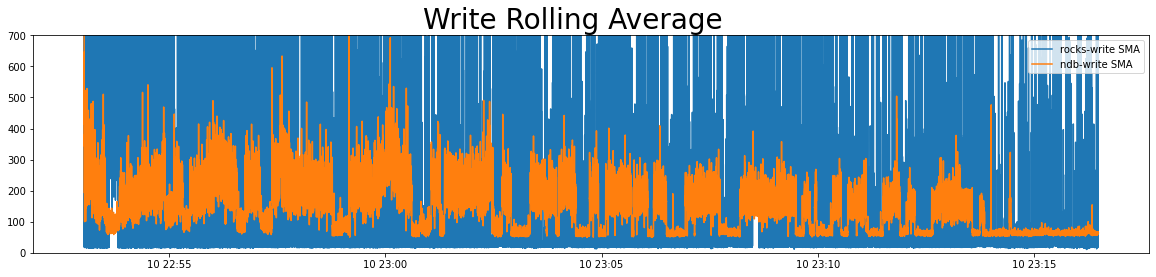

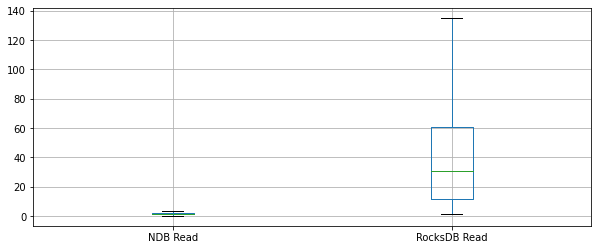

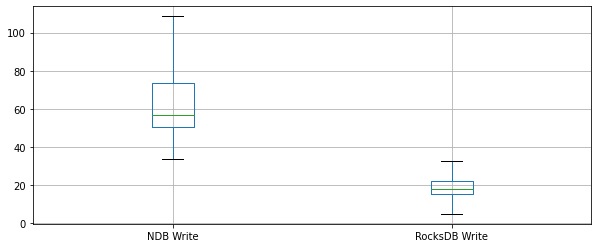

In [ ]:
#!gsutil cp -r gs://flinkndb-benchmark/kafka/experiment9 .
processing('experiment9')